## Force due to bending in the slab

Here I compare different approaches for calculating the force due to bending of a slab.
In particular, I compare a <i>standard</i> approach using a constant bending length, to the calculation from Ribe (GJI, 2010). 

Professor Magali Billen<br>
Earth and Planetary Sciences <br>
UC Davis <br>
Februar 15, 2018 <br>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Conversion Factors
sec2yr = 60*60*24*365  # sec to yr
d2r = np.pi/180

dip = np.arange(90,25,-5)
dips = 30  # shallow slab dip for constand calculation

wslab = 100*1000; # m
wcrt = 7.5*(1000)  # m

Lslab = 500e3/np.sin(dip*d2r)  # dip of 50 degrees to get slab length 
Lbend = 100e3/np.sin(dips*d2r)

# sinking velocity of the slab
vsink = 5/100/sec2yr  

# Viscosity of the slab-mantle
etaslabm = 1e19  # Pa-s

# Slab viscosity
etaslabmax = 1e24
etabend = 1e22

### Force due to Bending

Assuming a thin viscous sheet, the force due to internal bending can be found from the Moment. 
$$ F_{bend} = \eta_{bend} w_{slab}^3 V_{slab}/L_{bend}^3$$
Below I assume that $L_{bend}$ is equal to the length of the shear zone.

In [2]:

Fbend1 = etabend*wslab**3*vsink/(Lbend)**3
print(wslab/1000,Lbend/1000)
print("Fbend",Fbend1/1e13,"x1e13 N/m")

100.0 200.00000000000003
Fbend 0.1981861998985286 x1e13 N/m


### Force due to internal deformation of the slab 

From Ribe, GJI, 2010, the bending force is $$ F_{bend} = \eta_{bend} w_{slab}^3 V_{slab}/l_b^3$$ 

Note $l_b$ replaces what others would use as the radius of curvature for the shallow part of the slab.
The "effective" bending length comes from Ribe's analysis:
$$ l_b = A l_o + B L_{slab}$$
where A = 3.39, B = 0.58 to 0.82 and 
$$ l_o = \left(\frac{\gamma w_{slab}^3 w_{crt}^3}{9}\right)^{1/6} $$
where $\gamma = \eta_{bend}/\eta_{slab-m}$


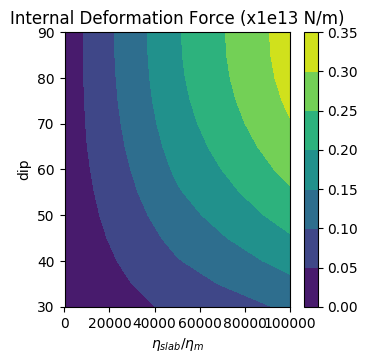

In [9]:
# Look at a range of slab viscosity (assumed constant for whole slab here) 
etaslab = np.array([1e21, 5e21, 1e22, 5e22, 1e23, 5e23, 1e24])

# Viscosity ratio eta_slab/eta_mantle
gamma = etaslab/etaslabm

# Determine effective bending lengthscale
lo = (gamma*wslab**3*wcrt**3/9)**(1/6)
A = 3.39;
B = 0.7;  # From range of 0.58 - 0.82

Fbend = np.zeros((np.size(etaslab),np.size(dip)),float)
Fbend1 = np.zeros((np.size(etaslab),np.size(dip)),float)

for i in range(0,np.size(etaslab),1):
    lb = A*lo[i] + B*Lslab
    Fbend[i,:] = etaslab[i]*wslab**3*vsink/lb**3
    Fbend1[i,:] = etaslab[i]*(0.5*wslab)**3*vsink/lb**3
#    print(Fbend[i,:])
[DIP,GAM] = np.meshgrid(dip,gamma)

plt.figure(figsize=(8,8), dpi=100)
plt.subplot(2,2,1)
cf = plt.contourf(GAM,DIP,Fbend/1e13)
plt.xlabel('$\eta_{slab}/\eta_m$')
plt.ylabel('dip')
plt.title('Internal Deformation Force (x1e13 N/m)')
plt.colorbar(cf)
plt.show()



### With dip dependent slab viscosity ?

For shallow dipping slabs, the viscosity is just the maximum viscosity, there's no weakening.
But for steeply dipping slabs, there is some weakening and the viscosity needs to drop. Here I approximate this weakening with the following equation:
$$\eta_{bend} = \eta_{slab}/10^{[3 - (2 tan^{-1}(90-\theta)/90)]}$$
For Ribe's formulation this also effects the effective bending length of the slab, which depends on $\gamma = \eta_{slab}/\eta_{mantle}$.

One can modify this equation depending on the amount of weakening. It also might jsut be better to use a simple linear relationship. 

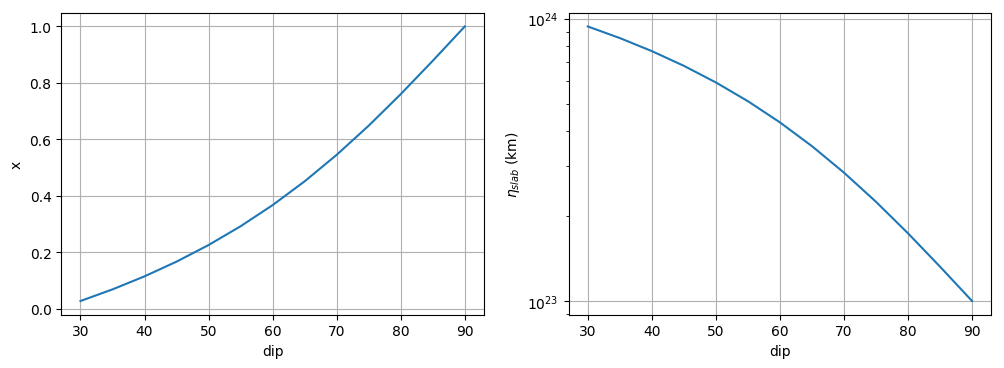

In [12]:
d2r = np.pi/180
x = 1-1*np.arctan(1.4*(90-dip)*d2r)
etaslab1 = etaslabmax/10**x

fig = plt.figure(figsize=(12,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(dip,x)
plt.xlabel('dip')
plt.ylabel('x')
plt.grid('on')
plt.subplot(1,2,2)
plt.semilogy(dip,etaslab1)
plt.xlabel('dip')
plt.ylabel('$\eta_{slab}$ (km)')
plt.grid('on')

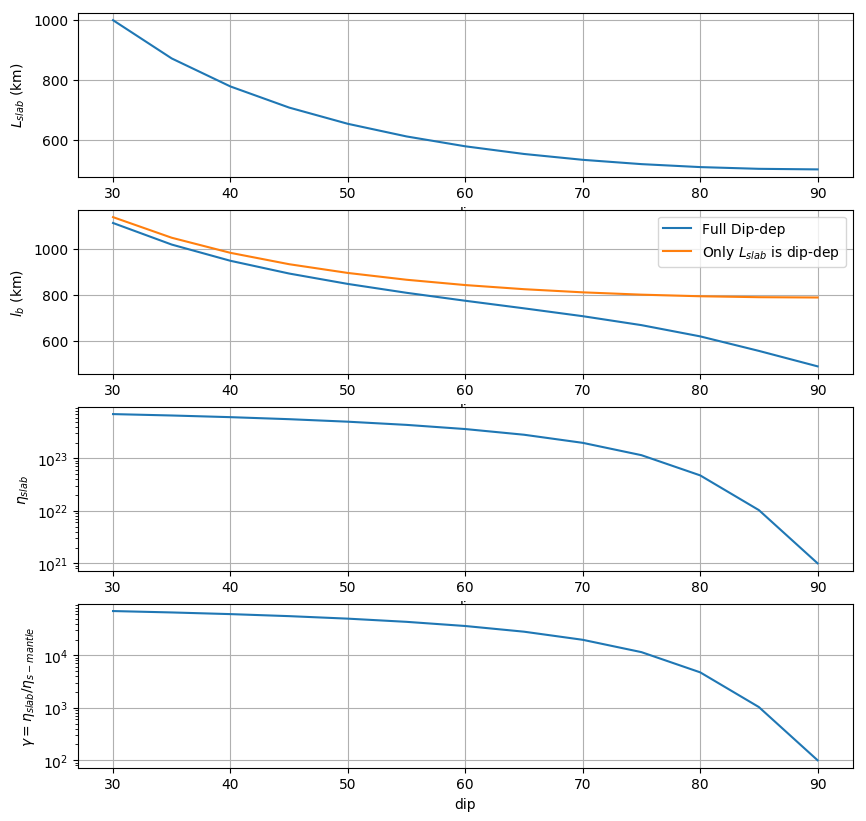

In [23]:
# Dip dependent slab viscosity
# This reduces the effective slab viscosity for steep dips
# which is what we see in the models. 

etaslab1 = etaslabmax/10**(3-2*np.arctan(10*(90-dip)/90))

# Viscosity ratio eta_slab/eta_mantle
gamma1 = etaslab1/etaslabm
lo = (gamma1*wslab**3*wcrt**3/9)**(1/6)
A = 3.39;
B = 0.7;  # From range of 0.58 - 0.82
lb = A*lo + B*Lslab

# with only dip-dep etaslab infront (lengthscale is fixed)
gamma = etaslabmax/etaslabm
lo2 = (gamma*wslab**3*wcrt**3/9)**(1/6)
lb2 = A*lo2 + B*Lslab

fig = plt.figure(figsize=(10,10), dpi=100)

plt.subplot(4,1,1)
plt.plot(dip,Lslab/1000)
plt.xlabel('dip')
plt.ylabel('$L_{slab}$ (km)')
plt.grid('on')

plt.subplot(4,1,2)
plt.plot(dip,lb/1000,label="Full Dip-dep")
plt.plot(dip,lb2/1000,label="Only $L_{slab}$ is dip-dep")
plt.xlabel('dip')
plt.ylabel('$l_b$ (km)')
plt.grid('on')
plt.legend()

plt.subplot(4,1,3)
plt.semilogy(dip,etaslab1)
plt.xlabel('dip')
plt.ylabel('$\eta_{slab}$')
plt.grid('on')

plt.subplot(4,1,4)
plt.semilogy(dip,gamma1)
plt.xlabel('dip')
plt.ylabel('$\gamma = \eta_{slab}/\eta_{s-mantle}$')
plt.grid('on')



So, from the plots above, we see that:
* $L_{slab}$ decreases with increasing dip (this is just space in upper mantle.
* $\eta_{slab}$ decreases with increasing dip (by several orders of magnitude, as defined by x)
* $\gamma$ decreases with increasing dip (by several orders of magnitude)
* $l_b$ provides a bending radius in the range of 500-1000 km. This value can depend on dip through both $\gamma$ and the dip-dependence of the length. 
- If only the length-dependence is included, then the bending radius range is smaller (800-1000 km; larger values), which will lead to lower bending forces at steeper dips.
- However, if $l_b$ also includes a decrease in $\eta_{slab}$ for steeper dips, then the bending radius is smaller, which will lead to larger bending forces.


### Comparison Depending on Various Choices

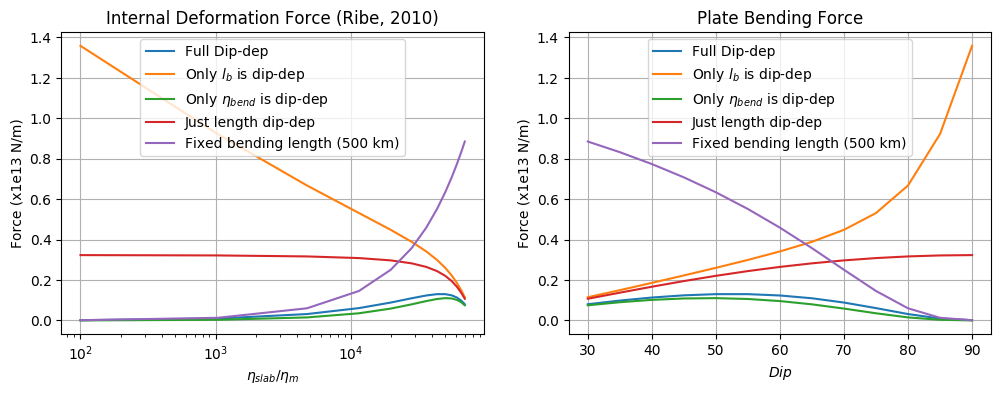

In [24]:
# sinking velocity of the slab
vsink = 5/100/sec2yr 
# with dip-dep etaslab and lb.
F2 = etaslab1*wslab**3*vsink/lb**3
# with only dip-dep etaslab in lb.
F21 = etaslabmax*wslab**3*vsink/lb**3

# with only dip-dep etaslab (lengthscale is fixed)
F22 = etaslab1*wslab**3*vsink/lb2**3
# Still depends on dip through Lslab - jsut the length of slab.
F3 = etaslabmax*wslab**3*vsink/lb2**3

# Compare to model in which the bending length is fixed at a much smaller value.
lfix = 500e3;
F4 = etaslab1*wslab**3*vsink/lfix**3

fig = plt.figure(figsize=(12,4), dpi=100)
plt.subplot(1,2,1)
plt.semilogx(gamma1,F2/1e13,label="Full Dip-dep")
plt.semilogx(gamma1,F21/1e13,label="Only $l_{b}$ is dip-dep")
plt.semilogx(gamma1,F22/1e13,label="Only $\eta_{bend}$ is dip-dep")
plt.semilogx(gamma1,F3/1e13,label="Just length dip-dep")
plt.semilogx(gamma1,F4/1e13,label="Fixed bending length (500 km)")
plt.xlabel('$\eta_{slab}/\eta_m$')
plt.ylabel('Force (x1e13 N/m)')
plt.title('Internal Deformation Force (Ribe, 2010)')
plt.grid('on')
plt.legend()

plt.subplot(1,2,2)
plt.plot(dip,F2/1e13,label="Full Dip-dep")
plt.plot(dip,F21/1e13,label="Only $l_{b}$ is dip-dep")
plt.plot(dip,F22/1e13,label="Only $\eta_{bend}$ is dip-dep")
plt.plot(dip,F3/1e13,label="Just length dip-dep")
plt.plot(dip,F4/1e13,label="Fixed bending length (500 km)")
plt.xlabel('$Dip$')
plt.ylabel('Force (x1e13 N/m)')
plt.title('Plate Bending Force')
plt.grid('on')
plt.legend()


So, what we see is that:
1. With only the length depending on dip, the force increases over a small range as the bending radius (slab length) decreases.
2. When only $l_b$ depends on dip, then the force increases a lot at large dip because the effective bending radius decreases more (this is the gamma dependence of $l_o$
3. When the viscosity of the slab is allowed to decrease at larger dip, this causes the bending force to decrease, effectively countering any effect of a shorter bending radius.
4. Finally, then allowing both $l_b$ and $\eta_{slab}$ in the force equation to be dip dependent, we predicut a maximum bending force of about 0.15e13 N/m at dips of about 50 degrees. The bending force is smaller at lower dip because the effective bending radius is smaller. The bending force is smaller at large dips, because the effective slab viscosity is lower.

Compare this behavior to the force predicted for a model witha fixed, smaller bending lengthscale (500 km). In this case, the bending force is dominated by the effective viscosity. As the bending viscosity drops at larger dips, the bending force also drops. 
 